In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import json
%matplotlib inline

There are two leagues in Major League Baseball, the **American League** and the **National League**. Some people have the assumption that the AL has better starting pitching than the NL.

We can use *Wins Above Replacement* (shortened to WAR), a summary statistic for pitchers (and batters) in baseball, to assert whether this claim is true or not. The higher the WAR for a given pitcher, the better.

Below we'll load in a JSON file that has the WAR statistic for 455 pitchers in the AL and 425 pitchers in the NL.

In [2]:
with open('data/baseball_WARs.json', 'r') as fp:
    baseball_WARs = json.load(fp)

We can load in the JSON file into a dictionary that has two lists, named NL and AL. Each list contains all of the WAR values for all of the pitchers in either league in the 2019 season.

In [3]:
[print(i) for i in baseball_WARs]

AL
NL


[None, None]

1. Show the histograms and boxplots for each of the leagues. What do each of the distributions look like? Are there outliers? Can we assume each of the distributions is normal?

In [4]:
#I don't know how to properly extract from JSON file so I manually copied the data over.
AL = [0.3, 0.6, 0.0, 0.6, -0.7, -0.1, -0.4, -0.1, 0.1, 0.4, 1.0, 0.9, -0.2, 0.1, 0.0, -0.3, 2.5, -0.6, -0.4, 0.9, -0.2, -0.1, 0.1, 0.0, 0.0, 0.0, 1.8, 0.0, -0.4, 0.2, 0.8, -0.4, 1.3, -0.2, -0.5, 1.0, 1.8, 1.9, -0.3, 0.6, 0.4, 3.3, 0.0, 0.4, -0.8, 5.0, -0.1, -0.8, -0.6, 0.3, -0.4, 0.3, -0.1, 3.5, 0.1, 0.2, 0.4, 0.9, 2.4, 0.0, 0.0, -0.3, 0.9, 2.8, 2.3, -0.1, 0.0, 0.9, -0.4, 1.1, 0.0, -0.1, -1.1, 0.3, 2.5, 0.6, 0.6, -0.2, 0.4, -0.1, 1.5, 0.7, 2.3, 0.1, 0.2, 1.6, 0.9, 4.2, 1.4, -0.4, -0.1, 6.9, -0.4, 1.0, 1.0, -0.4, -1.2, 0.0, 0.0, -0.1, 0.0, -0.5, -0.3, -0.5, 0.0, -0.1, 0.1, 0.0, 0.6, -0.4, 1.2, 1.0, 1.8, -0.8, 0.2, -0.3, 0.3, 0.2, -0.1, 0.0, 0.1, -0.4, -0.4, -0.7, 0.2, 1.4, 0.6, 0.0, -0.2, -0.4, -0.1, 2.9, -0.5, -0.1, 0.7, -0.1, -0.1, 0.0, 0.0, 0.2, -0.2, -0.5, -0.4, 0.1, -0.2, -0.1, 0.7, 0.8, 1.9, 0.2, 0.3, 2.4, -0.2, 5.6, 0.6, 2.6, 0.3, -0.3, 3.2, 0.4, -0.1, 0.0, 0.4, 1.7, 1.3, 0.2, -0.4, 0.2, 0.1, 0.2, -0.4, 0.8, -0.4, 1.2, 1.2, 0.5, 0.6, 2.1, 0.3, 0.0, -0.7, 1.0, -0.3, 0.2, 0.5, 3.5, 0.1, -0.6, 0.3, -0.4, -1.1, -1.3, 0.7, -0.9, 0.2, -0.1, 1.1, -2.4, 0.1, -0.3, 0.1, 0.6, -0.1, 0.2, 0.8, -0.2, 0.8, 0.1, 0.3, 0.1, 2.6, 0.8, -0.3, 1.4, 0.4, 0.0, 0.6, 0.4, -0.1, -0.4, 0.5, -0.2, 0.4, 0.1, 1.7, 0.3, 1.4, 0.9, -0.1, 0.2, -1.3, 0.5, -0.4, 0.0, 0.1, 0.5, 7.6, 0.1, 0.1, 0.1, 1.4, -0.1, -0.3, 1.8, 0.7, 1.5, -0.2, 0.0, 0.0, 0.2, 1.3, 0.2, 0.5, 0.0, 0.4, -0.1, 0.1, 4.5, -0.5, 0.0, 0.3, 0.4, 2.0, -1.0, -0.1, 1.3, 0.4, 7.8, 2.3, 1.2, -0.1, 0.5, -0.1, -0.1, 0.7, 0.0, 0.2, 5.1, 0.0, 0.5, 2.9, 2.1, 0.0, 3.6, 0.2, -0.1, 0.5, 2.0, 0.0, 2.2, -0.1, 2.4, -0.2, -0.3, 0.3, 2.2, -0.1, 1.3, 0.8, -0.4, -0.5, 0.2, 0.4, -0.1, 2.2, 0.3, -0.1, 2.5, -0.1, 0.1, 1.8, 0.5, 0.1, -0.1, 1.2, -0.1, 1.8, 1.8, 0.3, 0.2, -0.1, 0.1, -0.2, 0.8, 1.0, -0.2, 0.0, 0.0, 0.1, -0.6, -0.1, 0.6, 0.4, 0.0, 2.6, -0.3, -0.6, 0.1, 6.0, 0.3, 0.5, 0.1, -0.2, 2.5, -0.4, -0.2, -0.1, 0.3, 0.8, 0.0, 0.0, 0.2, -0.2, -0.1, -0.1, -0.1, -0.3, 0.4, 0.5, 0.4, 0.1, 2.3, 1.2, -0.2, 0.4, -0.4, -0.2, 0.1, 0.0, 0.0, -0.8, 0.6, 0.4, -0.6, 0.2, -0.1, 1.2, 0.9, -0.5, 0.0, 0.7, 0.7, 0.0, 0.0, -0.7, 0.0, 1.4, 0.4, 0.2, -0.2, -0.2, 0.1, 0.1, 0.9, 0.4, 0.0, -0.1, -0.6, -0.3, -1.3, -0.6, -0.2, 3.2, 0.2, -1.2, 0.0, 0.3, -0.3, -0.3, 1.7, -0.5, -0.2, 1.4, 0.1, -0.2, 1.7, -0.2, 0.0, -0.3, -0.9, -0.5, 0.8, 2.3, -0.1, 0.7, -0.6, 0.4, -0.1, 0.0, 7.8, -0.2, 0.1, 0.9, 1.2, 0.1, 0.4, 0.3, 0.2, 0.3, -0.3, 0.0, -0.4, 1.0, 1.4, 0.5, 3.2, -0.4, -0.5, -0.1, -0.3, 1.5, 0.1, 0.3, -0.7, -0.3]
NL = [0.1, 0.0, 0.6, 0.0, -0.2, 3.1, 0.2, -0.5, 0.2, 0.0, 0.8, -0.2, 1.8, -0.1, 0.5, -0.5, -0.8, 0.1, 0.0, 0.7, 0.9, 0.0, 0.3, 0.1, 0.6, 0.5, -0.4, 0.0, -0.5, -0.2, -0.4, -0.5, -0.2, 0.1, -0.1, -0.2, -0.3, -0.3, 0.0, 0.0, 0.3, -0.1, -0.1, 0.3, -0.1, 1.0, 0.6, 0.8, 0.4, 0.1, 2.2, 2.5, -0.5, -2.3, -0.4, 0.0, -0.4, 0.0, 4.7, 0.1, -0.7, 0.7, -0.3, 1.4, -1.0, 1.8, -0.3, 0.6, 0.2, -1.1, 0.4, 5.7, 0.4, -0.2, 0.1, 0.1, 3.3, 2.6, -0.1, -0.1, 0.0, -1.3, 0.2, -0.2, 7.3, -0.1, 2.9, 0.0, -0.6, 0.6, -0.1, 0.0, 0.0, 1.0, -0.1, -0.5, 0.0, -0.2, 0.3, -0.8, 1.2, -0.5, 1.5, -0.1, -0.3, -0.5, -0.1, 1.6, -0.4, -0.6, 0.1, 1.1, 0.6, -0.2, -0.2, 5.9, -0.3, -0.4, 0.9, 0.2, 0.0, 0.1, -0.7, 2.6, -1.1, 2.2, 2.7, 0.7, -0.2, 1.3, -0.1, 0.3, 1.2, -0.7, 0.7, -0.9, 0.8, 0.9, 1.9, 0.2, -0.5, 4.5, 5.6, 0.4, -0.1, 4.2, 0.0, -0.2, 0.2, 0.0, 1.3, -0.7, 0.2, 0.0, 2.6, 3.0, 0.3, 0.3, -0.9, 0.1, -0.4, 0.6, 3.8, 0.1, -1.9, 0.3, 0.6, 1.3, -0.3, 0.3, 0.0, -1.1, 0.1, -0.5, 1.7, -0.2, 2.2, 0.9, 0.4, 0.2, 0.3, 0.8, -0.4, 0.2, 0.7, 0.2, -0.4, -0.4, 0.1, 0.3, 0.0, 1.2, 0.2, -0.9, -0.5, 1.4, 3.5, 2.1, -0.5, -1.6, 0.8, 0.0, 1.7, -0.5, 0.3, 0.1, -0.4, 0.5, 1.0, -0.2, -0.4, 1.3, 1.0, -0.6, 0.5, 0.6, 2.0, 0.2, 2.0, 2.2, 1.9, -0.4, 1.3, 0.1, 0.0, -1.0, -0.1, 3.5, 0.0, 0.1, 0.9, -0.4, -0.6, 1.9, 0.1, -0.3, 0.0, -0.5, 0.4, -0.5, -1.1, -0.1, 0.9, 0.0, 0.7, 0.0, 1.8, -0.4, 0.2, 1.0, -0.8, -0.3, 0.1, -0.3, 0.3, -0.3, 1.3, 0.2, -0.3, 0.3, 1.7, -0.5, 1.8, -0.1, -0.4, 1.2, -0.1, -0.8, -0.2, 3.7, 0.1, 0.2, 0.1, 2.4, -0.6, 0.0, -0.4, 2.7, 0.0, 0.0, 0.0, 0.5, -0.9, -0.2, 0.1, 0.5, 0.0, 0.0, 0.1, 0.4, -0.5, 0.6, 0.7, 0.0, 0.1, -0.3, -0.1, 1.2, 0.6, -0.3, -0.1, 1.5, 0.2, -0.4, -0.6, -0.1, 0.0, -0.2, 1.3, -0.3, 1.6, 0.0, 0.3, -1.4, 0.8, 0.0, 0.7, -0.4, 0.3, -0.1, -1.0, 0.1, -0.1, -0.2, 1.1, 5.1, 0.4, 0.0, 2.9, 3.7, 0.0, -0.1, -0.1, -0.2, 5.8, -0.1, 0.0, 0.1, -0.1, 0.1, 0.6, -0.2, -0.1, 0.0, 0.4, 0.1, -0.1, 1.5, -0.1, 2.1, 0.5, -0.5, 5.7, 0.0, 0.8, -0.4, -0.3, 0.6, -0.3, -0.8, 0.7, 6.3, 0.5, 0.0, 0.9, 1.2, 0.0, -0.4, 0.9, 0.7, 1.0, 0.4, 2.3, 0.2, 2.7, 0.2, 1.1, -0.4, 0.0, -0.2, 1.3, 1.3, 2.9, 0.1, -0.2, -1.1, 0.3, 0.1, 1.2, 0.2, 1.9, 0.2, 0.1, 0.0, -0.2, 0.2, 1.7, 0.8, 0.0, 0.6, -0.1, 3.5, 0.6, -0.4, -0.2, -0.3, -0.1, -0.8, 0.5, -0.6, -0.5, 1.3, -0.5, -0.3, -0.2, -0.3, 2.9, -0.5, 1.0, 0.1, 2.8, -0.2, 0.8, 0.0, 0.0]

Text(0.5,0.92,'American League')

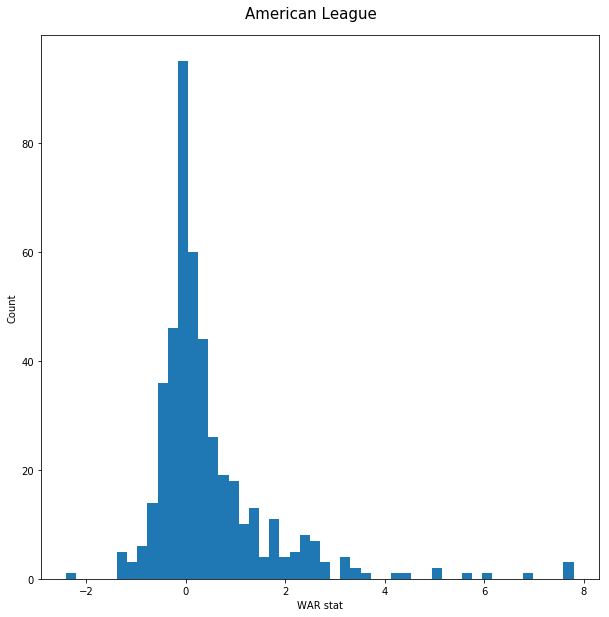

In [5]:
#American League Histogram
fig = plt.figure(figsize=(10,10))
plt.hist(AL, bins=50)
plt.xlabel('WAR stat')
plt.ylabel('Count')
fig.suptitle('American League', fontsize=15, y=0.92)

Text(0.5,0.92,'National League')

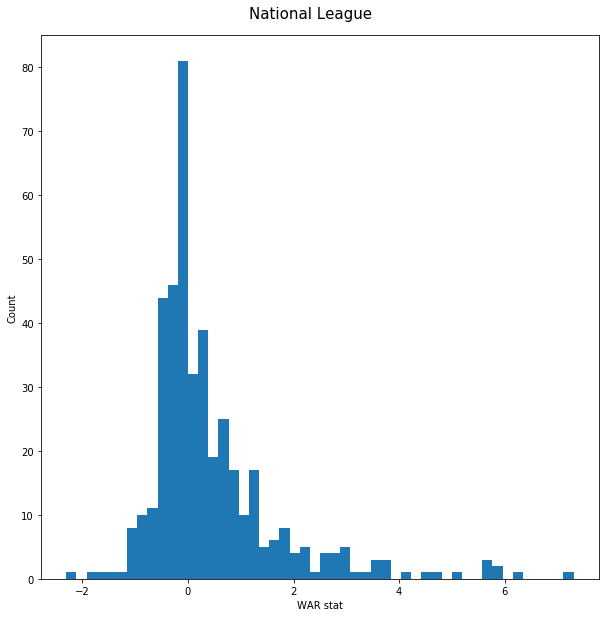

In [6]:
#National League Histogram
fig = plt.figure(figsize=(10,10))
plt.hist(NL, bins=50)
plt.xlabel('WAR stat')
plt.ylabel('Count')
fig.suptitle('National League', fontsize=15, y=0.92)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f58307f5f98>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5830803d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f58307f5e48>,
 'medians': [<matplotlib.lines.Line2D at 0x7f583080b668>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f583080bac8>,
 'means': []}

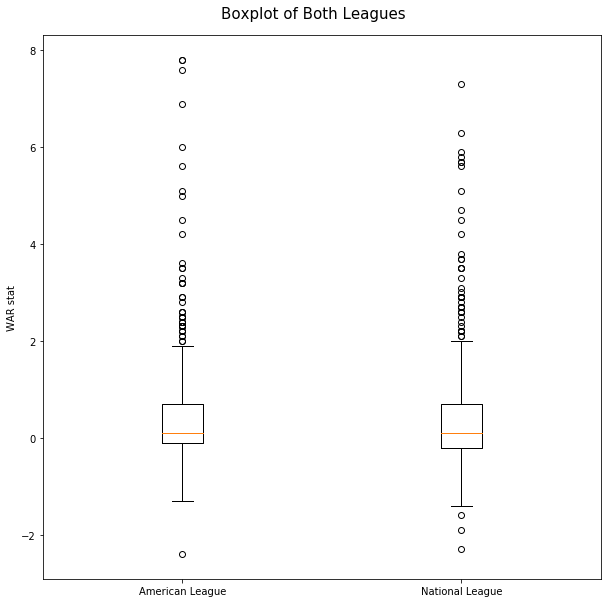

In [7]:
#American League Boxplot
fig = plt.figure(figsize=(10,10))
plt.ylabel('WAR stat')
fig.suptitle('Boxplot of Both Leagues', fontsize=15, y=0.92)
plt.boxplot([AL, NL], labels=['American League', 'National League'])

Both distribution look postively skewed. Both have many outliers as indicated by the boxplots. In all cases for a hypothesis test, we assume the underlying distribution is normal.

2. Say that we want to first see if the average WAR in each of the leagues is the same, or are *different* from each other. In this case, what is our null hypothesis and our alternate hypothesis?

H0 = The average WAR in each league are the same.
HA = The average WAR in each league are not the same.

3. Using the pooled variance function below, find the pooled variance and pooled standard deviation of the two leagues.

In [8]:
def custom_pooled_variance(a, b):
    return ((((len(a) - 1) * np.var(a, ddof=1)) + ((len(b) - 1) * np.var(b, ddof=1))) / (len(a) + len(b) - 2)) * ((1/len(a)) + 1/len(b))
pooled_var = custom_pooled_variance(AL, NL)
print('Pooled Variance:', np.round(pooled_var, 2))
print('Pooled Standard Deviation:', np.round(np.sqrt(pooled_var), 2))

Pooled Variance: 0.01
Pooled Standard Deviation: 0.08


4. Find the proper parameters for the T-distribution to test our null hypothesis. What is the mean, standard deviation, and degrees of freedom of our null hypothesis?

In [23]:
#T-distribution parameters: mean = 0.0134, STD = 0.08 and dof = 882.
print('DOF is: ', len(AL)+len(NL)+2)

DOF is:  882


5. At a signifiance level of 0.05, what are the rejection regions of our distribution? Make a plot highlighting these rejection regions in red.

Rejection Region: Less than -0.16
Rejection Region: Greater than 0.16


Text(0.5,0.92,'T-Distribution of Difference Between Leagues')

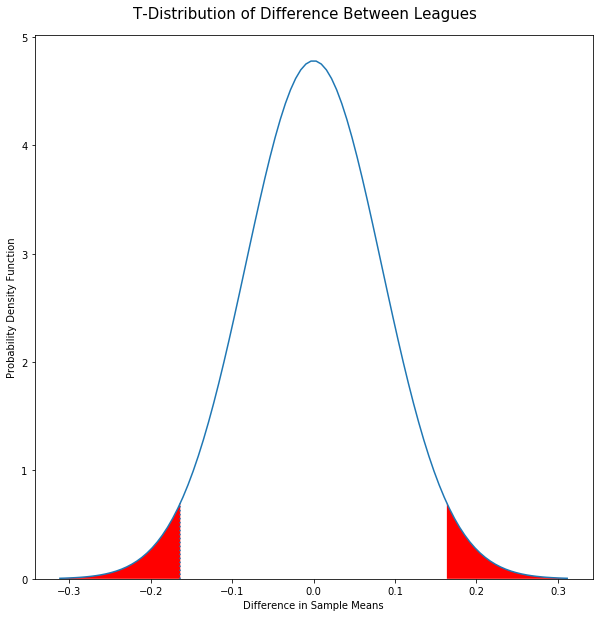

In [38]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=882)
print('Rejection Region: Less than', np.round(dist.ppf(0.025), 2))
print('Rejection Region: Greater than', np.round(dist.ppf(0.975),2))

fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.025), dist.ppf(0.025)],[0, dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')

X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.025))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)

X_fill = np.linspace(dist.ppf(0.975), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')

plt.xlabel('Difference in Sample Means')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between Leagues', fontsize=15, y=0.92)

6. What is the mean difference in WAR between the two leagues (compute AL minus NL)?

In [21]:
#Mean difference
np.mean(AL)-np.mean(NL)

0.013437621202327055

7. Given that we are doing a two-sided test, can we reject the null hypothesis here? What is the p-value of our observed difference?

No, mean difference is within the rejection region.

In [22]:
#p-value
dist.cdf(np.mean(AL)-np.mean(NL))

0.5639876784063672

8. Given that the original assertion was that the AL has **better** pitching than the NL, state the new null and alternate hypotheses for this test.

H0: NL has better pitching than AL
HA: NL does not have better pitching than AL

9. At a signifiance level of 0.05, what is the new rejection region of our distribution? Make a plot highlighting this rejection region in red.

Rejection Region: Less than -0.14


Text(0.5,0.92,'T-Distribution of Difference Between Leagues')

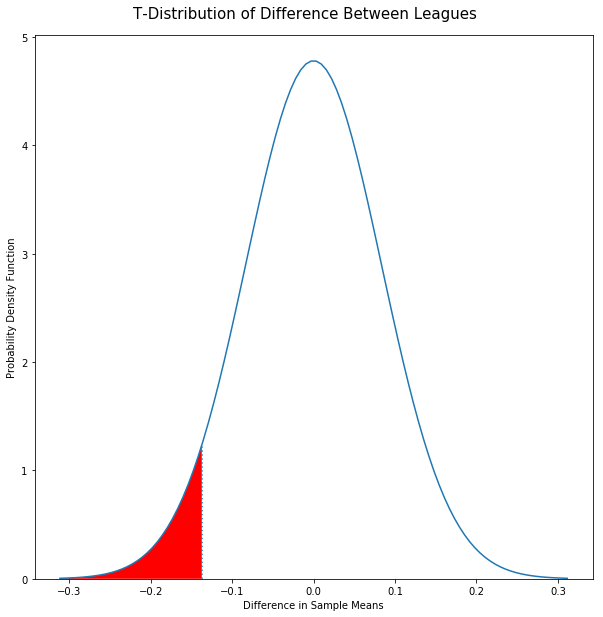

In [40]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=882)
print('Rejection Region: Less than', np.round(dist.ppf(0.05), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.05), dist.ppf(0.05)],[0, dist.pdf(dist.ppf(0.05))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.05))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in Sample Means')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between Leagues', fontsize=15, y=0.92)

10. Given that we are doing a one-sided test, can we reject the null hypothesis here? What is the p-value of our observed difference?

In [41]:
#No, mean difference is still within the rejection region.
#P-value
dist.cdf(np.mean(AL)-np.mean(NL))

0.5639876784063672

11. As you (hopefully) observed, the underlying distributions are skewed, which means that they technically violate the underlying assumption of normality for a two-sided T-test.

To address this, do a bootstrap test with 10,000 samples using the method we did in class. Use a random seed of 42 and graph the results (again, compute AL minus NL)

In [42]:
np.random.seed(42)
diff = []
for i in range(10000):
    total = AL + NL
    np.random.shuffle(total)
    new_a = total[:len(AL)]
    new_b = total[len(NL):]
    diff.append(np.mean(new_b) - np.mean(new_a))

Text(0.5,0.92,'Bootstrap Distribution of Difference Between League')

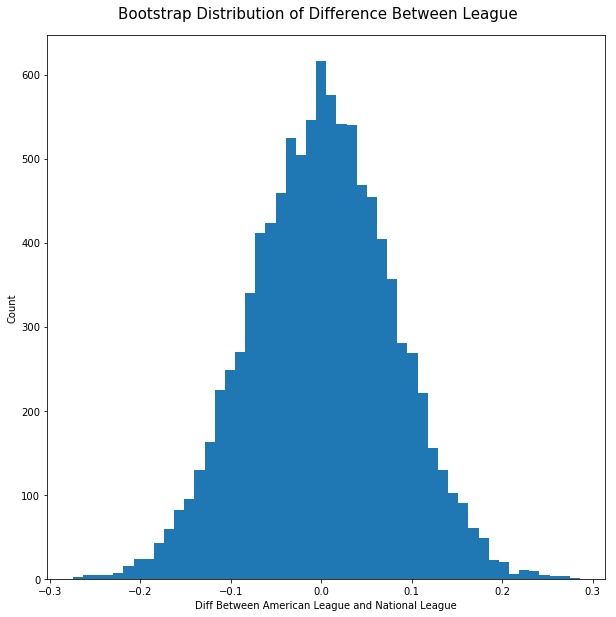

In [43]:
fig = plt.figure(figsize=(10,10))
plt.hist(diff, bins=50)
plt.xlabel('Diff Between American League and National League')
plt.ylabel('Count')
fig.suptitle('Bootstrap Distribution of Difference Between League', fontsize=15, y=0.92)

12. For a one-sided test at a signifiance level of 0.05, calculate the rejection region of this distribution.

In [45]:
#One-sided test, p = 0.05
#Note that 5 is an integer here meaning 5th percentile
np.percentile(diff, 5)

-0.12836263736263745

13. What is the p-value of our observed difference?

In [46]:
#p-value
dist.cdf(np.percentile(diff, 5))

0.062053274082238624

BONUS: Say that someone claims to have found a long-lost work by Shakespeare. We want to try and verify if this work is by Shakespeare by comparing the frequency of common words to see if the relative frequencies are similar to what Shakespeare would have written.

|Word |  a |an | this  | that |
|---|---|---| --- | --- |
|King Lear   |  150|  30 | 30 | 90
| Lost Work  |  90 |  20 | 10 | 80

14. Run a Chi-Squared contingency test on this data to see if these two works could conceivably come from the same distribution. Can we reject the null hypothesis at a significance level of 0.05?

15. How many degrees of freedom are there in the Chi-Squared distribution?

16. Given the number of degrees of freedom, at what level can we reject the n ull hypothesis?